# Extract Data from an API

In [ ]:
import requests
import pandas as pd

# Example API endpoint
url = "https://sheetdb.io/api/v1/3digbv94ticxe"

# Send GET request
response = requests.get(url)

# Check status code
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print("Data extracted successfully.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Data extracted successfully.


# Transform the Data

In [ ]:
# Example transformation: selecting specific columns
df = df[['id', 'first_name', 'last_name', 'email', 'gender','amount','timestramp','location','is_fraud','device_used','spending_deviation_score','velocity_score','geo_anomaly_score','payment_channel','ip_address','device_hash','transaction_type','merchant_category']].copy()


print("Data Transformed:")
print(df.head())


Data Transformed:
  id first_name  last_name                    email  gender   amount  \
0  1    Romonda   Roycroft    rroycroft0@jalbum.net  Female  $434.43   
1  2  Annaliese  Trethowan  atrethowan1@squidoo.com  Female  $710.54   
2  3     Marion   Hartropp     mhartropp2@hexun.com    Male  $502.79   
3  4     Dmitri   Woollard   dwoollard3@myspace.com    Male  $776.08   
4  5     Claire     Ilbert   cilbert4@people.com.cn  Female  $463.30   

  timestramp location is_fraud device_used spending_deviation_score  \
0    6:37 PM       KS    FALSE      mobile                    -0.21   
1    3:46 AM       IL    FALSE         atm                    -0.14   
2    3:21 PM       OH    FALSE         pos                    -1.78   
3    5:54 PM       ME    FALSE         pos                     -0.6   
4    1:07 PM       ME     TRUE      mobile                     0.79   

  velocity_score geo_anomaly_score payment_channel       ip_address  \
0              3              0.22            card 

# Load the dataset

In [ ]:
import pandas as pd

# Load data from the API
url = "https://sheetdb.io/api/v1/3digbv94ticxe"
df = pd.read_json(url)

# Save the raw data to CSV
df.to_csv("raw_dataset.csv", index=False)
print("Raw dataset saved as raw_dataset.csv")



Raw dataset saved as raw_dataset.csv


# Check the head

In [ ]:
df.head()

,id,first_name,last_name,email,gender,amount,timestramp,location,is_fraud,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,transaction_type,merchant_category
0,1,Romonda,Roycroft,rroycroft0@jalbum.net,Female,$434.43,6:37 PM,KS,FALSE,mobile,-0.21,3,0.22,card,13.101.214.112,D8536477,withdrawal,utilities
1,2,Annaliese,Trethowan,atrethowan1@squidoo.com,Female,$710.54,3:46 AM,IL,FALSE,atm,-0.14,7,0.96,ACH,172.52.47.194,D2622631,withdrawal,online
2,3,Marion,Hartropp,mhartropp2@hexun.com,Male,$502.79,3:21 PM,OH,FALSE,pos,-1.78,20,0.89,card,185.98.35.23,D4823498,deposit,other
3,4,Dmitri,Woollard,dwoollard3@myspace.com,Male,$776.08,5:54 PM,ME,FALSE,pos,-0.6,6,0.37,wire_transfer,107.136.36.87,D9961380,deposit,online
4,5,Claire,Ilbert,cilbert4@people.com.cn,Female,$463.30,1:07 PM,ME,TRUE,mobile,0.79,13,0.27,ACH,108.161.108.255,D7637601,transfer,utilities


# Handle missing values and apply data normalization techniques.

In [ ]:
df.shape

(10000, 18)

In [ ]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'amount',
       'timestramp', 'location', 'is_fraud', 'device_used',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash', 'transaction_type',
       'merchant_category'],
      dtype='object')

In [ ]:
# Replace known "fake nulls" with actual NaN
df.replace(["", "null", "NA"], pd.NA, inplace=True)

# Now check again
df.isna().sum()

,0
id,1
first_name,1
last_name,1
email,1
gender,1
amount,247
timestramp,210
location,100
is_fraud,243
device_used,1


In [ ]:
# Force numeric conversion for numeric columns
numeric_cols = [
   "spending_deviation_score", "velocity_score", "geo_anomaly_score"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Now fill missing values using mean or median
df["spending_deviation_score"] = df["spending_deviation_score"].fillna(df["spending_deviation_score"].median())
df["velocity_score"] = df["velocity_score"].fillna(df["velocity_score"].median())
df["geo_anomaly_score"] = df["geo_anomaly_score"].fillna(df["geo_anomaly_score"].mean())

In [ ]:

# Impute categorical columns using mode
categorical_cols = [
    "id", "first_name", "last_name", "email", "gender", "device_used",
    "payment_channel", "transaction_type", "merchant_category"
]

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# is_fraud (likely binary or categorical)
df["is_fraud"] = df["is_fraud"].fillna(df["is_fraud"].mode()[0])

# Timestamp (forward fill; avoid deprecated `method='ffill'`)
df["timestramp"] = df["timestramp"].ffill()

# location (can also be filled with mode or ffill)
df["location"] = df["location"].fillna(df["location"].mode()[0])

In [ ]:
print("Missing after imputation:\n", df.isna().sum())

Missing after imputation:
 id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
amount                      247
timestramp                    0
location                      0
is_fraud                      0
device_used                   0
spending_deviation_score      0
velocity_score                0
geo_anomaly_score             0
payment_channel               0
ip_address                    0
device_hash                   0
transaction_type              0
merchant_category             0
dtype: int64


In [ ]:
# Step 1: Remove "$" and "," from amount strings
df["amount"] = df["amount"].replace('[\$,]', '', regex=True)

# Step 2: Convert to numeric safely (this will turn invalid/missing to NaN)
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")

# Step 3: Fill missing values with mean
df["amount"] = df["amount"].fillna(df["amount"].mean())

In [ ]:
df.isna().sum()

,0
id,0
first_name,0
last_name,0
email,0
gender,0
amount,0
timestramp,0
location,0
is_fraud,0
device_used,0


In [ ]:
df.head()

,id,first_name,last_name,email,gender,amount,timestramp,location,is_fraud,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,transaction_type,merchant_category
0,1,Romonda,Roycroft,rroycroft0@jalbum.net,Female,434.43,6:37 PM,KS,FALSE,mobile,-0.21,3.0,0.22,card,13.101.214.112,D8536477,withdrawal,utilities
1,2,Annaliese,Trethowan,atrethowan1@squidoo.com,Female,710.54,3:46 AM,IL,FALSE,atm,-0.14,7.0,0.96,ACH,172.52.47.194,D2622631,withdrawal,online
2,3,Marion,Hartropp,mhartropp2@hexun.com,Male,502.79,3:21 PM,OH,FALSE,pos,-1.78,20.0,0.89,card,185.98.35.23,D4823498,deposit,other
3,4,Dmitri,Woollard,dwoollard3@myspace.com,Male,776.08,5:54 PM,ME,FALSE,pos,-0.60,6.0,0.37,wire_transfer,107.136.36.87,D9961380,deposit,online
4,5,Claire,Ilbert,cilbert4@people.com.cn,Female,463.30,1:07 PM,ME,TRUE,mobile,0.79,13.0,0.27,ACH,108.161.108.255,D7637601,transfer,utilities


# Normalization Technique ( Min Max Scaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Define the numerical columns
numeric_cols = ["amount", "spending_deviation_score", "velocity_score", "geo_anomaly_score"]

In [ ]:
# Apply Min-Max normalization
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df[numeric_cols].head()

,amount,spending_deviation_score,velocity_score,geo_anomaly_score
0,0.434490,0.501272,0.105263,0.22
1,0.710683,0.510178,0.315789,0.96
2,0.502871,0.301527,1.000000,0.89
3,0.776243,0.451654,0.263158,0.37
4,0.463369,0.628499,0.631579,0.27


In [ ]:
df.head()

,id,first_name,last_name,email,gender,amount,timestramp,location,is_fraud,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,transaction_type,merchant_category
0,1,Romonda,Roycroft,rroycroft0@jalbum.net,Female,0.434490,6:37 PM,KS,FALSE,mobile,0.501272,0.105263,0.22,card,13.101.214.112,D8536477,withdrawal,utilities
1,2,Annaliese,Trethowan,atrethowan1@squidoo.com,Female,0.710683,3:46 AM,IL,FALSE,atm,0.510178,0.315789,0.96,ACH,172.52.47.194,D2622631,withdrawal,online
2,3,Marion,Hartropp,mhartropp2@hexun.com,Male,0.502871,3:21 PM,OH,FALSE,pos,0.301527,1.000000,0.89,card,185.98.35.23,D4823498,deposit,other
3,4,Dmitri,Woollard,dwoollard3@myspace.com,Male,0.776243,5:54 PM,ME,FALSE,pos,0.451654,0.263158,0.37,wire_transfer,107.136.36.87,D9961380,deposit,online
4,5,Claire,Ilbert,cilbert4@people.com.cn,Female,0.463369,1:07 PM,ME,TRUE,mobile,0.628499,0.631579,0.27,ACH,108.161.108.255,D7637601,transfer,utilities


In [ ]:
df["timestramp"] = pd.to_datetime(df["timestramp"], format="%I:%M %p").dt.time

In [ ]:
print(df["timestramp"].head())

0    18:37:00
1    03:46:00
2    15:21:00
3    17:54:00
4    13:07:00
Name: timestramp, dtype: object


In [ ]:
df.head()

,id,first_name,last_name,email,gender,amount,timestramp,location,is_fraud,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,transaction_type,merchant_category
0,1,Romonda,Roycroft,rroycroft0@jalbum.net,Female,0.434490,18:37:00,KS,FALSE,mobile,0.501272,0.105263,0.22,card,13.101.214.112,D8536477,withdrawal,utilities
1,2,Annaliese,Trethowan,atrethowan1@squidoo.com,Female,0.710683,03:46:00,IL,FALSE,atm,0.510178,0.315789,0.96,ACH,172.52.47.194,D2622631,withdrawal,online
2,3,Marion,Hartropp,mhartropp2@hexun.com,Male,0.502871,15:21:00,OH,FALSE,pos,0.301527,1.000000,0.89,card,185.98.35.23,D4823498,deposit,other
3,4,Dmitri,Woollard,dwoollard3@myspace.com,Male,0.776243,17:54:00,ME,FALSE,pos,0.451654,0.263158,0.37,wire_transfer,107.136.36.87,D9961380,deposit,online
4,5,Claire,Ilbert,cilbert4@people.com.cn,Female,0.463369,13:07:00,ME,TRUE,mobile,0.628499,0.631579,0.27,ACH,108.161.108.255,D7637601,transfer,utilities


#  Feature engineering to extract behavioral patterns and anomalies.

In [ ]:
import numpy as np

In [ ]:
## Time based features from timestarp
df["hour"] = pd.to_datetime(df["timestramp"], format="%H:%M:%S").dt.hour
df["minute"] = pd.to_datetime(df["timestramp"], format="%H:%M:%S").dt.minute

df["is_night"] = df["hour"].apply(lambda x: 1 if x < 6 or x > 22 else 0)

In [ ]:
# Amount-Based Behavior
df["amount_log"] = np.log1p(df["amount"])  # Normalize skewed values
df["is_high_value"] = df["amount"] > df["amount"].quantile(0.95)  # Top 5% spending


In [ ]:
# Count how many transactions per location/device
df["device_freq"] = df.groupby("device_hash")["device_hash"].transform("count")
df["location_freq"] = df.groupby("location")["location"].transform("count")


In [ ]:
df["is_geo_anomaly"] = df["geo_anomaly_score"] > 1.5


In [ ]:
# Label encoding for model input
from sklearn.preprocessing import LabelEncoder

for col in ["device_used", "payment_channel", "transaction_type", "merchant_category"]:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [ ]:
## composit anomaly score
df["anomaly_score"] = (
    df["geo_anomaly_score"] +
    df["spending_deviation_score"].abs() +
    df["velocity_score"]
)


In [ ]:
df["is_anomaly"] = df["anomaly_score"] > df["anomaly_score"].quantile(0.95)


In [ ]:
df.head()

,id,first_name,last_name,email,gender,amount,timestramp,location,is_fraud,device_used,...,hour,minute,is_night,amount_log,is_high_value,device_freq,location_freq,is_geo_anomaly,anomaly_score,is_anomaly
0,1,Romonda,Roycroft,rroycroft0@jalbum.net,Female,0.434490,18:37:00,KS,FALSE,1,...,18,37,0,0.360810,False,1,220,False,0.826535,False
1,2,Annaliese,Trethowan,atrethowan1@squidoo.com,Female,0.710683,03:46:00,IL,FALSE,0,...,3,46,1,0.536893,False,1,635,False,1.785968,False
2,3,Marion,Hartropp,mhartropp2@hexun.com,Male,0.502871,15:21:00,OH,FALSE,2,...,15,21,0,0.407377,False,1,580,False,2.191527,False
3,4,Dmitri,Woollard,dwoollard3@myspace.com,Male,0.776243,17:54:00,ME,FALSE,2,...,17,54,0,0.574500,False,1,111,False,1.084812,False
4,5,Claire,Ilbert,cilbert4@people.com.cn,Female,0.463369,13:07:00,ME,TRUE,1,...,13,7,0,0.380741,False,1,111,False,1.530078,False


In [ ]:
df.shape

(10000, 28)

In [ ]:
 df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
 df.head()

,id,first_name,last_name,email,gender,amount,timestramp,location,is_fraud,device_used,...,hour,minute,is_night,amount_log,is_high_value,device_freq,location_freq,is_geo_anomaly,anomaly_score,is_anomaly
0,1,Romonda,Roycroft,rroycroft0@jalbum.net,1.0,0.434490,18:37:00,KS,FALSE,1,...,18,37,0,0.360810,False,1,220,False,0.826535,False
1,2,Annaliese,Trethowan,atrethowan1@squidoo.com,1.0,0.710683,03:46:00,IL,FALSE,0,...,3,46,1,0.536893,False,1,635,False,1.785968,False
2,3,Marion,Hartropp,mhartropp2@hexun.com,0.0,0.502871,15:21:00,OH,FALSE,2,...,15,21,0,0.407377,False,1,580,False,2.191527,False
3,4,Dmitri,Woollard,dwoollard3@myspace.com,0.0,0.776243,17:54:00,ME,FALSE,2,...,17,54,0,0.574500,False,1,111,False,1.084812,False
4,5,Claire,Ilbert,cilbert4@people.com.cn,1.0,0.463369,13:07:00,ME,TRUE,1,...,13,7,0,0.380741,False,1,111,False,1.530078,False


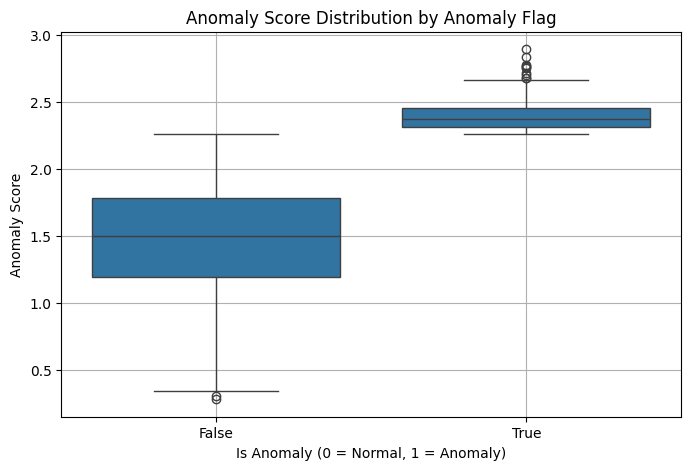

In [ ]:
# Box plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["is_anomaly"], y=df["anomaly_score"])
plt.title("Anomaly Score Distribution by Anomaly Flag")
plt.xlabel("Is Anomaly (0 = Normal, 1 = Anomaly)")
plt.ylabel("Anomaly Score")
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Compute correlation only for numeric columns
corr = df.corr(numeric_only=True)


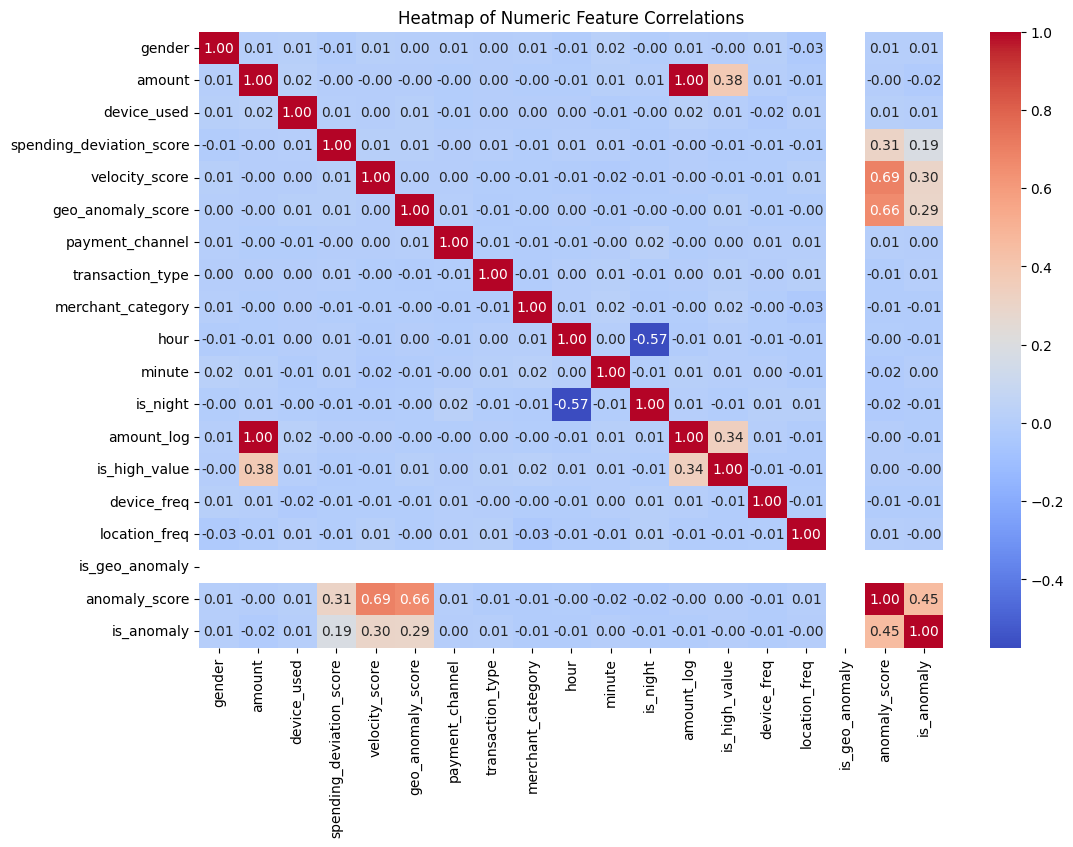

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numeric Feature Correlations')
plt.show()


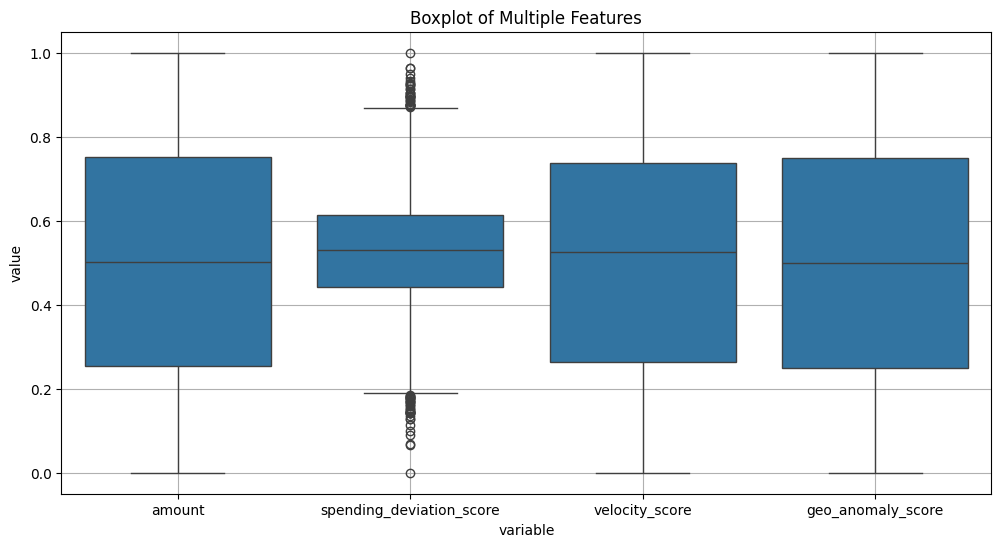

In [ ]:
features = ["amount", "spending_deviation_score", "velocity_score", "geo_anomaly_score"]

plt.figure(figsize=(12, 6))
df_melted = df[features].melt()
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title("Boxplot of Multiple Features")
plt.grid(True)
plt.show()

In [ ]:
# Supervise Machine learning model
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report




In [ ]:
df_model = df.drop(columns=["first_name", "last_name", "email", "ip_address", "device_hash","timestramp","location"])
df_model.head()

,id,gender,amount,is_fraud,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,transaction_type,...,hour,minute,is_night,amount_log,is_high_value,device_freq,location_freq,is_geo_anomaly,anomaly_score,is_anomaly
0,1,1.0,0.434490,FALSE,1,0.501272,0.105263,0.22,2,3,...,18,37,0,0.360810,False,1,220,False,0.826535,False
1,2,1.0,0.710683,FALSE,0,0.510178,0.315789,0.96,0,3,...,3,46,1,0.536893,False,1,635,False,1.785968,False
2,3,0.0,0.502871,FALSE,2,0.301527,1.000000,0.89,2,0,...,15,21,0,0.407377,False,1,580,False,2.191527,False
3,4,0.0,0.776243,FALSE,2,0.451654,0.263158,0.37,3,0,...,17,54,0,0.574500,False,1,111,False,1.084812,False
4,5,1.0,0.463369,TRUE,1,0.628499,0.631579,0.27,0,2,...,13,7,0,0.380741,False,1,111,False,1.530078,False


In [ ]:
df_model["gender"].fillna(df_model["gender"].mode()[0], inplace=True)


/tmp/ipython-input-839861790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model["gender"].fillna(df_model["gender"].mode()[0], inplace=True)


In [ ]:
for col in ["is_geo_anomaly", "is_anomaly", "is_fraud"]:
    df_model[col] = df_model[col].astype(str).str.lower().map({"false": 0, "true": 1})



In [ ]:
df_model.head()

,id,gender,amount,is_fraud,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,transaction_type,...,hour,minute,is_night,amount_log,is_high_value,device_freq,location_freq,is_geo_anomaly,anomaly_score,is_anomaly
0,1,1.0,0.434490,0,1,0.501272,0.105263,0.22,2,3,...,18,37,0,0.360810,False,1,220,0,0.826535,0
1,2,1.0,0.710683,0,0,0.510178,0.315789,0.96,0,3,...,3,46,1,0.536893,False,1,635,0,1.785968,0
2,3,0.0,0.502871,0,2,0.301527,1.000000,0.89,2,0,...,15,21,0,0.407377,False,1,580,0,2.191527,0
3,4,0.0,0.776243,0,2,0.451654,0.263158,0.37,3,0,...,17,54,0,0.574500,False,1,111,0,1.084812,0
4,5,1.0,0.463369,1,1,0.628499,0.631579,0.27,0,2,...,13,7,0,0.380741,False,1,111,0,1.530078,0


In [ ]:

X = df_model.drop("is_fraud", axis=1)  # drop label column
y = df_model["is_fraud"]

In [ ]:
X.head()

,id,gender,amount,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,transaction_type,merchant_category,hour,minute,is_night,amount_log,is_high_value,device_freq,location_freq,is_geo_anomaly,anomaly_score,is_anomaly
0,1,1.0,0.434490,1,0.501272,0.105263,0.22,2,3,7,18,37,0,0.360810,False,1,220,0,0.826535,0
1,2,1.0,0.710683,0,0.510178,0.315789,0.96,0,3,2,3,46,1,0.536893,False,1,635,0,1.785968,0
2,3,0.0,0.502871,2,0.301527,1.000000,0.89,2,0,3,15,21,0,0.407377,False,1,580,0,2.191527,0
3,4,0.0,0.776243,2,0.451654,0.263158,0.37,3,0,2,17,54,0,0.574500,False,1,111,0,1.084812,0
4,5,1.0,0.463369,1,0.628499,0.631579,0.27,0,2,7,13,7,0,0.380741,False,1,111,0,1.530078,0


In [ ]:
y.head()

,is_fraud
0,0
1,0
2,0
3,0
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

l = LogisticRegression(max_iter=1000)
l.fit(X_train_clean, y_train_clean)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
X_train_clean

,id,gender,amount,device_used,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,transaction_type,merchant_category,hour,minute,is_night,amount_log,is_high_value,device_freq,location_freq,is_geo_anomaly,anomaly_score,is_anomaly
1191,1192,1.0,0.810283,2,0.503817,0.473684,0.78,1,2,7,14,45,0,0.593483,False,1,627,0,1.757501,0
4458,4459,1.0,0.501687,2,0.270992,0.947368,0.29,2,0,4,9,48,0,0.406589,False,1,635,0,1.508361,0
1131,1132,0.0,0.230079,3,0.202290,0.789474,0.69,3,3,0,12,22,0,0.207078,False,1,277,0,1.681764,0
9562,9563,0.0,0.880604,0,0.717557,0.473684,0.46,0,2,2,22,23,0,0.631593,False,1,573,0,1.651241,0
6579,6580,1.0,0.521626,0,0.395674,0.631579,0.43,3,3,1,14,27,0,0.419780,False,1,219,0,1.457253,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,351,0.0,0.971511,1,0.374046,0.947368,0.80,0,3,6,21,13,0,0.678800,True,1,203,0,2.121414,0
79,80,0.0,0.452016,2,0.599237,0.789474,0.44,2,2,4,12,23,0,0.372953,False,1,580,0,1.828710,0
8039,8040,1.0,0.349625,2,0.695929,0.473684,0.60,1,1,1,5,30,1,0.299827,False,1,154,0,1.769613,0
6936,6937,0.0,0.325278,3,0.489822,0.578947,0.62,3,1,3,14,36,0,0.281622,False,1,877,0,1.688769,0


In [ ]:
y_train_clean

,is_fraud
1191,1
4458,1
1131,1
9562,1
6579,0
...,...
350,0
79,1
8039,0
6936,0


In [ ]:
print(X_train.isnull().sum())

id                          0
gender                      0
amount                      0
device_used                 0
spending_deviation_score    0
velocity_score              0
geo_anomaly_score           0
payment_channel             0
transaction_type            0
merchant_category           0
hour                        0
minute                      0
is_night                    0
amount_log                  0
is_high_value               0
device_freq                 0
location_freq               0
is_geo_anomaly              0
anomaly_score               0
is_anomaly                  0
dtype: int64


In [ ]:

y_pred = l.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.31      0.37      1431
           1       0.52      0.69      0.59      1569

    accuracy                           0.51      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.50      0.51      0.49      3000



In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt


In [ ]:
y_probs = l.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


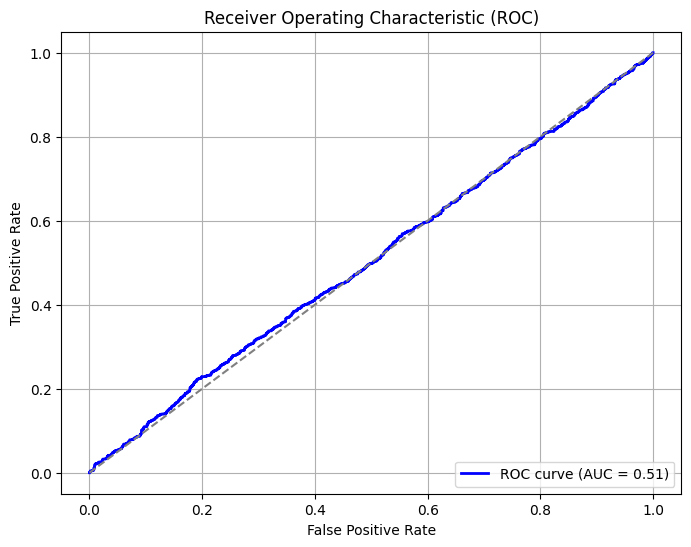

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Clustering


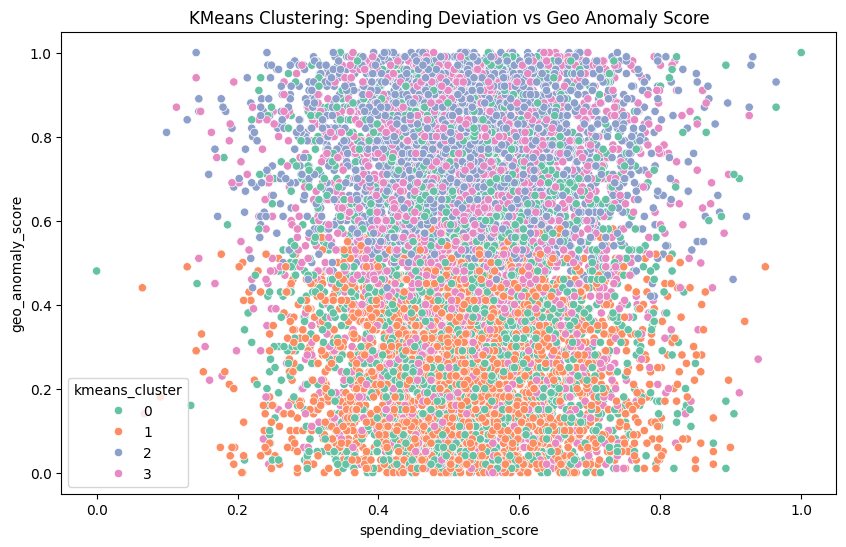

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical features
features = ['amount', 'spending_deviation_score', 'velocity_score', 'geo_anomaly_score']
X_cluster = df[features]

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='spending_deviation_score', y='geo_anomaly_score', hue='kmeans_cluster', palette='Set2')
plt.title("KMeans Clustering: Spending Deviation vs Geo Anomaly Score")
plt.show()

Orange cluster dominates the lower geo_anomaly_score region i.e Normal transactions done in usual locations.

KMeans is less effective here than DBSCAN — it is trying to impose clusters on what appears to be continuous data.

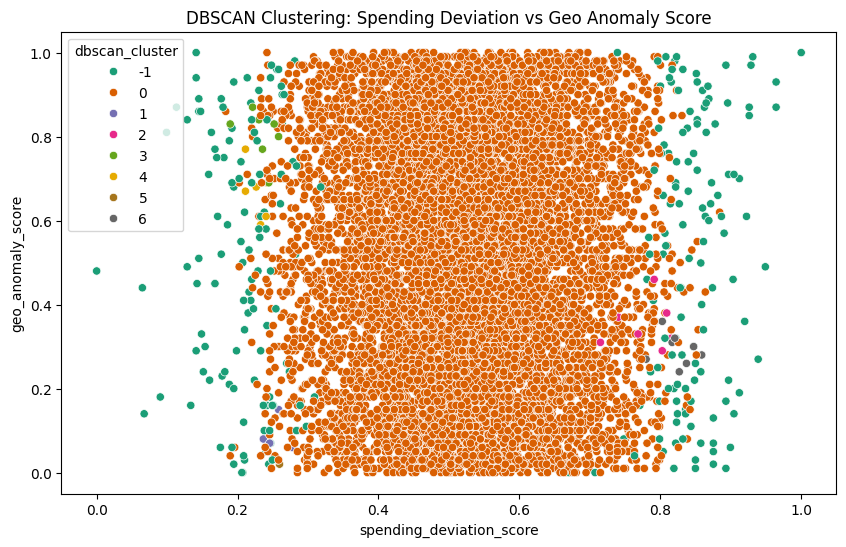

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# DBSCAN requires scaled data (if not already done)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = db.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='spending_deviation_score', y='geo_anomaly_score', hue='dbscan_cluster', palette='Dark2')
plt.title("DBSCAN Clustering: Spending Deviation vs Geo Anomaly Score")
plt.show()

The dense orange cluster represents most normal transactions, with spending_deviation_score between 0.3 to 0.8, and geo_anomaly_score between 0.2 to 0.9.This means most users spend within expected limits and in expected locations.

Green points indicate noise which represent potential fraudulent transactions.

## Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
                    param_grid, scoring='f1', cv=5, n_jobs=-1)

grid.fit(X_train_clean, y_train_clean)

print("Best parameters:", grid.best_params_)

# Evaluate best estimator
y_pred_best = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_best))


Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.47      0.43      0.45      1431
           1       0.51      0.55      0.53      1569

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Applying Supervised algorithms



 Model: Decision Tree
 Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1431
           1       0.51      0.49      0.50      1569

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000

 Confusion Matrix:
[[698 733]
 [795 774]]


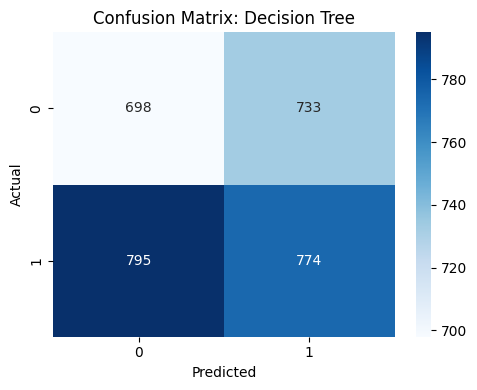


 Model: Random Forest
 Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1431
           1       0.54      0.54      0.54      1569

    accuracy                           0.52      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.52      0.52      0.52      3000

 Confusion Matrix:
[[700 731]
 [720 849]]


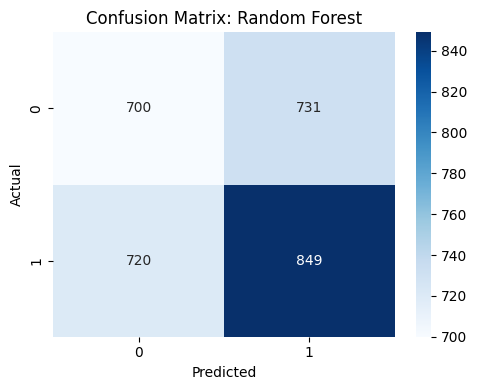


 Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:06:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      1431
           1       0.52      0.51      0.52      1569

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

 Confusion Matrix:
[[688 743]
 [762 807]]


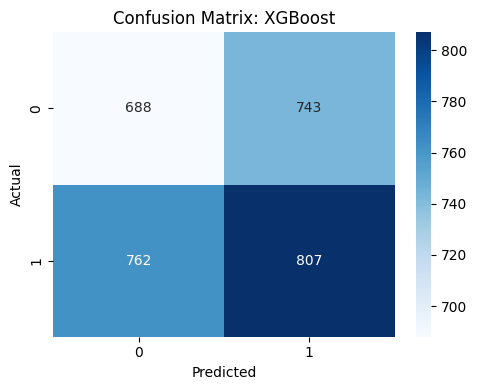


 Model: LightGBM
[LightGBM] [Info] Number of positive: 3576, number of negative: 3424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
 Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49      1431
           1       0.52      0.50      0.51      1569

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

 Confusion Matrix:
[[709 722]
 [781 788]]


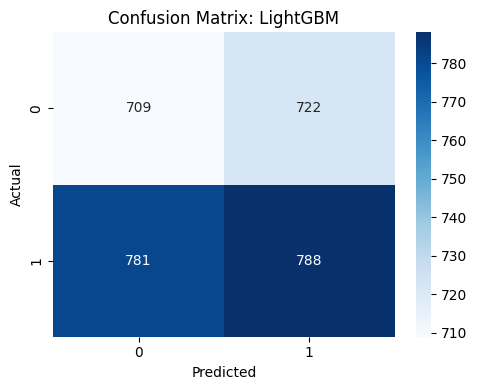


 Model Performance Summary:
           Model  Accuracy  Precision    Recall  F1 Score
1  Random Forest  0.516333   0.537342  0.541109  0.539219
2        XGBoost  0.498333   0.520645  0.514340  0.517474
3       LightGBM  0.499000   0.521854  0.502231  0.511854
0  Decision Tree  0.490667   0.513603  0.493308  0.503251


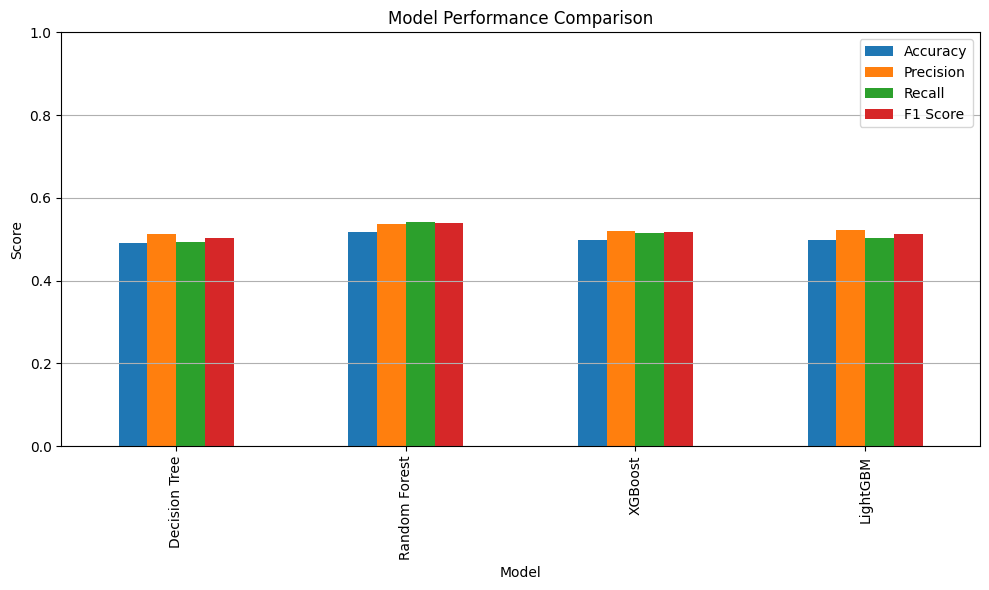

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Optional: Encode categorical features if needed
def preprocess_data(X_train, X_test):
    # Option 1: Drop object columns like 'id', etc.
    X_train = X_train.select_dtypes(include=['int64', 'float64', 'bool']).copy()
    X_test = X_test.select_dtypes(include=['int64', 'float64', 'bool']).copy()


    return X_train, X_test

#  Preprocess features
X_train_clean, X_test_clean = preprocess_data(X_train_clean, X_test)

#  Handle class imbalance for XGBoost
scale_pos_weight = (y_train_clean == 0).sum() / (y_train_clean == 1).sum()

#  Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight,
                             use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced')
}

# Store performance
results = []

#  Confusion Matrix Plot
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Train & Evaluate Models
for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train_clean, y_train_clean)
    y_pred = model.predict(X_test_clean)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append to results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    # Print classification report
    print(" Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(" Confusion Matrix:")
    print(cm)
    plot_confusion_matrix(cm, name)

#  Display final model performance
results_df = pd.DataFrame(results)
print("\n Model Performance Summary:")
print(results_df.sort_values(by='F1 Score', ascending=False))

#  Bar Plot Comparison
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
!pip install shap

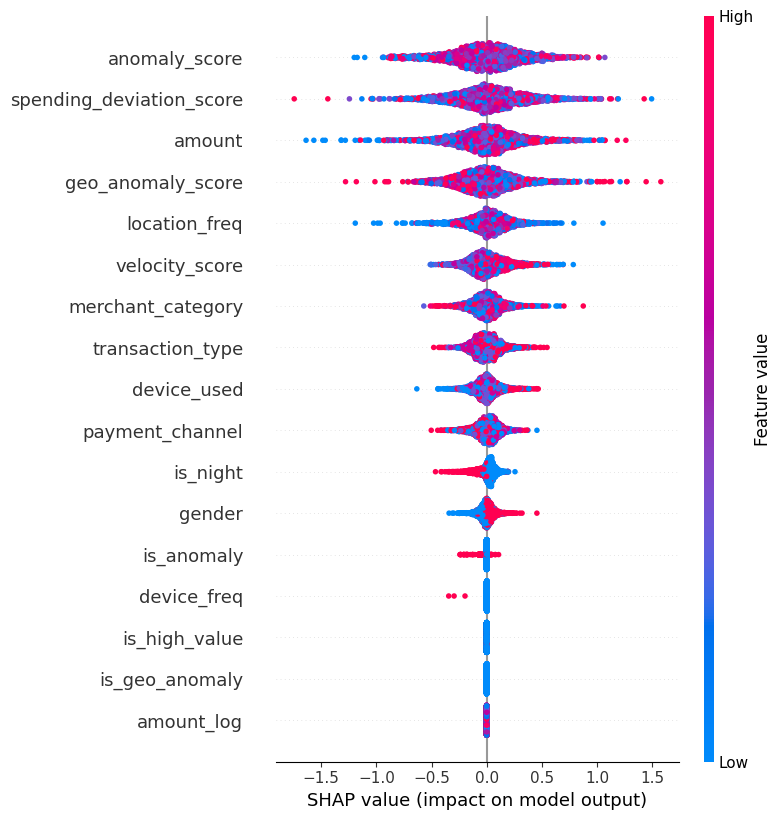

In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure the model you're explaining is XGBoost
xgb_model = models["XGBoost"]  # or use the actual variable if you stored it differently

# Create a TreeExplainer
explainer_xgb = shap.TreeExplainer(xgb_model)

# Get SHAP values for the test set
shap_values_xgb = explainer_xgb.shap_values(X_test_clean)

# Visualize SHAP summary plot
shap.summary_plot(shap_values_xgb, X_test_clean)


# Unsupervised Learning


In [ ]:

# === Unsupervised anomaly detection pipeline (integrated) ===
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neural_network import MLPRegressor

# If dataset 'df' isn't defined, try loading from earlier saved CSV
try:
    df
except NameError:
    df = pd.read_csv("fraud_data.csv")  # fallback; ensure path correct

# Preprocessing: numeric conversion and imputation
df_clean = df.copy()
for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')
df_clean = df_clean.dropna(how='all')
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_cols])

# Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_scaled)
df_clean['iso_pred'] = iso.predict(X_scaled)
df_clean['iso_score'] = iso.decision_function(X_scaled)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.01, kernel='rbf', gamma='scale')
ocsvm.fit(X_scaled)
df_clean['ocsvm_pred'] = ocsvm.predict(X_scaled)

# Autoencoder surrogate with MLPRegressor
hidden_size = max(1, X_scaled.shape[1] // 2)
mlp = MLPRegressor(hidden_layer_sizes=(hidden_size,), activation='relu', max_iter=500,
                   random_state=42, early_stopping=True, n_iter_no_change=10)
mlp.fit(X_scaled, X_scaled)
reconstructed = mlp.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstructed), axis=1)
df_clean['autoencoder_mse'] = mse
threshold = np.percentile(mse, 99)
df_clean['autoencoder_flag'] = (df_clean['autoencoder_mse'] > threshold).astype(int)

# Consensus scoring
df_clean['anomaly_score_combined'] = ((df_clean['iso_pred']==-1).astype(int)
                                     + (df_clean['ocsvm_pred']==-1).astype(int)
                                     + df_clean['autoencoder_flag'])

# Summary
print('=== Unsupervised anomaly detection summary ===')
print('IsolationForest anomalies:', (df_clean['iso_pred']==-1).sum())
print('OneClassSVM anomalies:', (df_clean['ocsvm_pred']==-1).sum())
print('Autoencoder top 1%:', df_clean['autoencoder_flag'].sum())
print('\nTop 10 suspicious by combined score:')
display(df_clean.sort_values('anomaly_score_combined', ascending=False)[['anomaly_score_combined','iso_pred','ocsvm_pred','autoencoder_flag'] + numeric_cols].head(10))

# Save annotated output
output_path = 'unsupervised_output_merged.csv'
df_clean.to_csv(output_path, index=False)
print(f'Saved merged output to {output_path}')


/tmp/ipython-input-342657056.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')


=== Unsupervised anomaly detection summary ===
IsolationForest anomalies: 100
OneClassSVM anomalies: 125
Autoencoder top 1%: 100

Top 10 suspicious by combined score:


,anomaly_score_combined,iso_pred,ocsvm_pred,autoencoder_flag,id,gender,amount,device_used,spending_deviation_score,velocity_score,...,merchant_category,hour,minute,is_night,amount_log,device_freq,location_freq,anomaly_score,kmeans_cluster,dbscan_cluster
3994,3,-1,-1,1,3995,1.0,0.334030,0,0.849873,0.157895,...,0,16,4,0,0.288205,1,219,1.017768,1,-1
23,3,-1,-1,1,24,1.0,0.115165,3,0.821883,0.684211,...,2,23,41,1,0.109002,1,111,1.576093,3,-1
5647,3,-1,-1,1,5648,1.0,0.049495,0,0.851145,0.000000,...,7,1,20,1,0.048309,1,762,1.801145,2,-1
1335,3,-1,-1,1,1336,1.0,0.051956,3,0.842239,0.842105,...,3,23,23,1,0.050651,1,220,2.544344,3,-1
9608,3,-1,-1,1,9609,1.0,0.276803,0,0.160305,0.947368,...,3,23,24,1,0.244359,1,56,1.327674,3,-1
8997,3,-1,-1,1,8998,0.0,0.871561,3,0.857506,0.000000,...,6,7,28,0,0.626773,1,635,1.097506,1,-1
1982,3,-1,-1,1,1983,1.0,0.904921,3,0.259542,0.000000,...,0,0,56,1,0.644441,1,154,0.279542,1,5
1624,2,1,-1,1,1625,0.0,0.164559,1,0.232824,0.157895,...,3,8,30,0,0.152343,1,47,0.980719,2,4
7030,2,-1,-1,0,7031,0.0,0.993198,0,0.159033,0.000000,...,1,12,4,0,0.689740,1,277,0.869033,2,-1
6196,2,-1,-1,0,6197,1.0,0.135551,0,0.181934,0.052632,...,5,1,36,1,0.127118,1,174,0.474565,1,-1


Saved merged output to unsupervised_output_merged.csv


In [ ]:
! pip install pandas matplotlib networkx